In [18]:
import astropy.io.fits
import numpy as np
fits = astropy.io.fits.open("../data/HSC_grizy_example.fits")
table = fits[1].data

def getMagnitude(table, magzero, dict_filter_flux):
    
    mags = {}
    
    mask = np.ones(len(table), dtype=bool)
    
    for key, val in dict_filter_flux.items():
        mask = np.isfinite(table[val])
        table = table[mask]
        mask = table[val] > 0.0            
        table = table[mask]
    
    for key, val in dict_filter_flux.items():
        mags[key] = -2.5 * numpy.log(table[val]) + magzero     
    
    return mags

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

mags = getMagnitude(table, 27.0, {"g": "G_FLUX_KRON", "r": "R_FLUX_KRON", "i": "I_FLUX_KRON", "z": "Z_FLUX_KRON"})

In [23]:
g_r = mags['g'] - mags['r']
i_z = mags['i'] - mags['z']

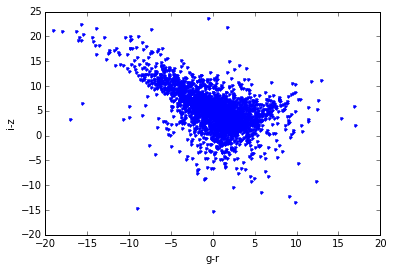

In [34]:
plt.plot(g_r,i_z, '.')
plt.xlabel('g-r')
plt.ylabel('i-z')
plt.xlim(-20,20)
plt.ylim(-20,25)
plt.show()

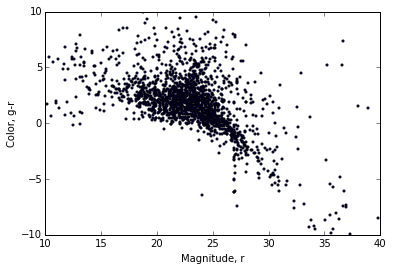

In [38]:
fields = {k: "{}_FLUX_PSF".format(k.upper()) for k in ('g','r')}
mags1 = getMagnitude(table, 27.0, fields)
r = mags1['r']
g_r_PSF = mags1['g'] - mags1['r']
plt.scatter(r, g_r_PSF, s=4.0)
plt.xlabel('Magnitude, r')
plt.ylabel('Color, g-r')
plt.xlim(10,40)
plt.ylim(-10,10)
plt.show()